<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>

<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            pySelection library for time series features selection
        </font>
    </h1>
    <br/>
    <h2>
        <font color="#0E1117">
            Example of use
        </font>
    </h2>
</Center>

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Libraries import
        </font>
    </h2>
</div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pySelection import FeatureSelection, Metrics

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
train = pd.read_csv("train.csv", sep=",")
test = pd.read_csv("test.csv", sep=",")
date = pd.read_csv("date.csv", sep=",")

In [3]:
y_train = train["DR"]

X_train = train[
    [
        "DR_lag_1",
        "DR_lag_2",
        "DR_lag_3",
        "DR_lag_4",
        "RGDP",
        "RGDP_lag_1",
        "RGDP_lag_2",
        "RGDP_lag_4",
        "HICP_lag_4",
        "RREP_lag_1",
        "IRLT_lag_2",
        "IRLT_lag_3",
        "UNR_lag_3",
        "UNR_lag_4"
    ]
]


y_test = test["DR"]

X_test = test[
    [
        "DR_lag_1",
        "DR_lag_2",
        "DR_lag_3",
        "DR_lag_4",
        "RGDP",
        "RGDP_lag_1",
        "RGDP_lag_2",
        "RGDP_lag_4",
        "HICP_lag_4",
        "RREP_lag_1",
        "IRLT_lag_2",
        "IRLT_lag_3",
        "UNR_lag_3",
        "UNR_lag_4"
    ]
]

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Functionalities
        </font>
    </h2>
</div>

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            1. Generate random combinations of features
        </font>
    </h2>
</div>

In [4]:
model = FeatureSelection(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    scoring="U",
    n_iter=100,
    min_features=None,
    y_lag_select=None,
    random_state=42
)

In [5]:
# fit the model
model.fit()

LinearRegression(n_jobs=-1, normalize='deprecated')

In [6]:
# get the best model
model.get_params()

{'Model': 'RREP_lag_1, DR_lag_2, HICP_lag_4',
 'MAE': 0.0007964284723596003,
 'MSE': 7.660942097909363e-07,
 'RMSE': 0.0008752680788141062,
 'UM': 0.023144547008651595,
 'US': 2.7884646779957242e-06,
 'UC': 0.9535018936509708,
 'U1': 0.031094481582686153,
 'U': 0.015584100449633275}

In [7]:
# get all estimated models and associated scores
model.get_scores()

,Model,MAE,MSE,RMSE,UM,US,UC,U1,U
0,"RREP_lag_1, DR_lag_2, HICP_lag_4",0.000796,7.660942e-07,0.000875,0.023145,0.000003,0.953502,0.031094,0.015584
1,"RGDP_lag_1, DR_lag_2, DR_lag_4",0.000671,8.469252e-07,0.000920,0.331621,0.035454,0.614340,0.032694,0.016503
2,"RGDP_lag_2, DR_lag_1",0.000720,9.523513e-07,0.000976,0.102989,0.010218,0.862566,0.034669,0.017431
3,"RGDP_lag_1, DR_lag_2, DR_lag_1, HICP_lag_4",0.000841,9.913836e-07,0.000996,0.151911,0.012918,0.806741,0.035372,0.017564
4,"RGDP_lag_4, RREP_lag_1, DR_lag_1, HICP_lag_4",0.000774,1.024613e-06,0.001012,0.224255,0.041699,0.678706,0.035960,0.017827
...,...,...,...,...,...,...,...,...,...
95,"RGDP_lag_1, HICP_lag_4",0.013113,1.742287e-04,0.013200,0.986924,0.004203,0.008495,0.468924,0.190112
96,"UNR_lag_3, RGDP_lag_2, RGDP, IRLT_lag_3",0.008009,1.583124e-04,0.012582,0.184349,0.720074,0.095692,0.446992,0.197969
97,"RGDP_lag_4, IRLT_lag_2, RGDP",0.010900,1.835785e-04,0.013549,0.647215,0.290651,0.062806,0.481341,0.199269
98,"RGDP_lag_2, RGDP, RREP_lag_1",0.012658,2.361889e-04,0.015368,0.678327,0.266524,0.056148,0.545974,0.220043


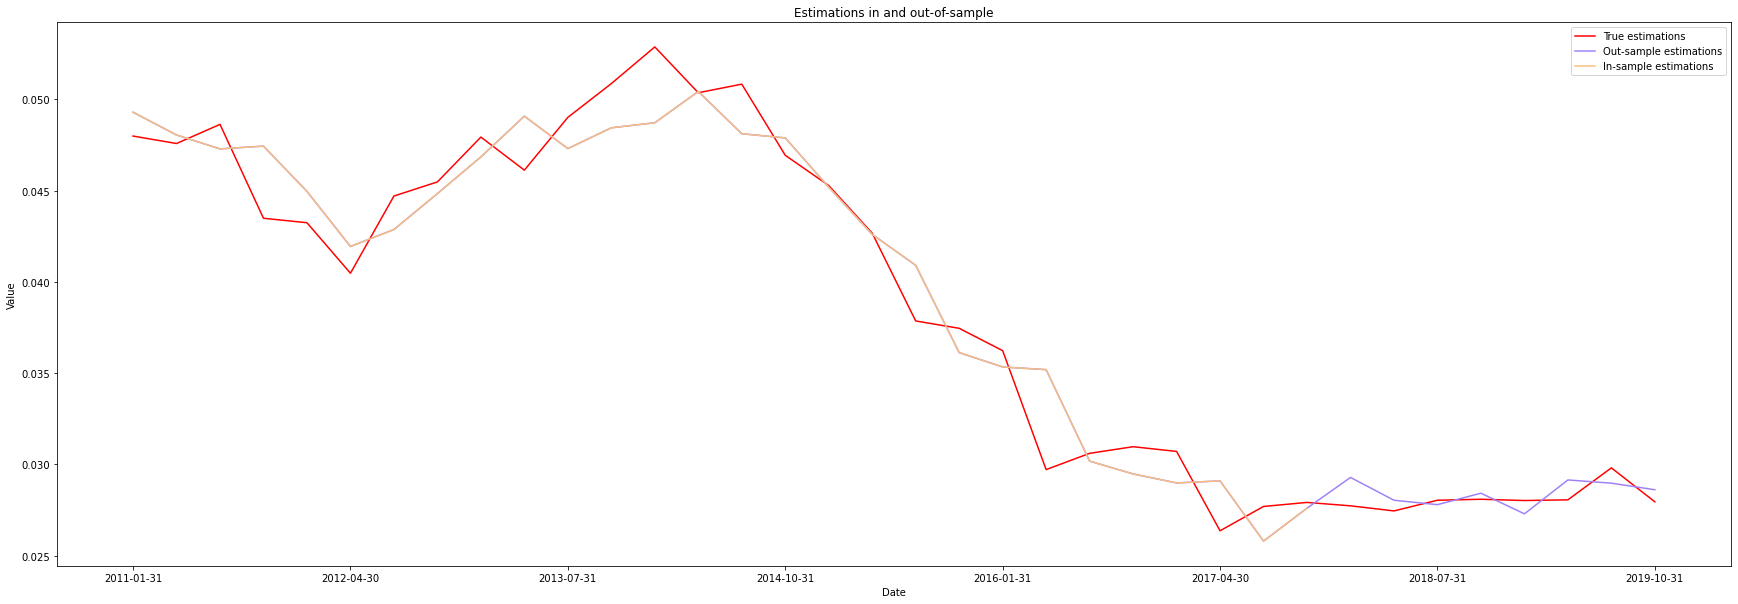

In [8]:
# plot the estimated values of the best model
model.get_plot(date=date["Date"], color1="red", color2="#9F81F7", color3="#F7BE81")

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            2. Generate random combinations of features by including the lag 2 of the Y feature
        </font>
    </h2>
</div>

In [9]:
model = FeatureSelection(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    scoring="U",
    n_iter=100,
    min_features=5,
    y_lag_select=["DR_lag_2"],
    random_state=42
)

In [10]:
# fit the model
model.fit()

LinearRegression(n_jobs=-1, normalize='deprecated')

In [11]:
# get the best model
model.get_params()

{'Model': 'RGDP_lag_1, DR_lag_3, DR_lag_4, DR_lag_1, HICP_lag_4, RREP_lag_1, RGDP_lag_2, DR_lag_2, UNR_lag_4',
 'MAE': 0.0008237901342374237,
 'MSE': 8.202496105036247e-07,
 'RMSE': 0.0009056763276709979,
 'UM': 0.2688054436671843,
 'US': 0.009086297670747152,
 'UC': 0.6528876361364971,
 'U1': 0.03217475488058072,
 'U': 0.01622200949501798}

In [12]:
# get all estimated models and associated scores
model.get_scores()

,Model,MAE,MSE,RMSE,UM,US,UC,U1,U
0,"RGDP_lag_1, DR_lag_3, DR_lag_4, DR_lag_1, HICP...",0.000824,8.202496e-07,0.000906,0.268805,0.009086,0.652888,0.032175,0.016222
1,"DR_lag_1, HICP_lag_4, RGDP_lag_4, RGDP, DR_lag...",0.000879,1.108807e-06,0.001053,0.383658,0.006937,0.568710,0.037408,0.018923
2,"RGDP_lag_1, IRLT_lag_2, DR_lag_1, HICP_lag_4, ...",0.000871,1.139088e-06,0.001067,0.014240,0.227542,0.672244,0.037916,0.018995
3,"DR_lag_3, DR_lag_4, DR_lag_1, HICP_lag_4, RREP...",0.000945,1.230347e-06,0.001109,0.385997,0.003498,0.606142,0.039405,0.019947
4,"RGDP_lag_1, DR_lag_4, DR_lag_1, HICP_lag_4, DR...",0.000918,1.349702e-06,0.001162,0.422746,0.003715,0.552887,0.041273,0.020363
...,...,...,...,...,...,...,...,...,...
95,"RGDP_lag_1, IRLT_lag_2, IRLT_lag_3, HICP_lag_4...",0.003573,3.479435e-05,0.005899,0.122017,0.648962,0.232326,0.209554,0.100264
96,"RGDP_lag_1, UNR_lag_3, DR_lag_4, DR_lag_1, RGD...",0.003673,3.322682e-05,0.005764,0.000435,0.787452,0.209549,0.204780,0.101138
97,"RGDP_lag_1, DR_lag_3, DR_lag_4, HICP_lag_4, RG...",0.003902,4.728628e-05,0.006877,0.045218,0.788147,0.163389,0.244292,0.117516
98,"RGDP_lag_1, IRLT_lag_2, DR_lag_3, DR_lag_4, RG...",0.004665,5.666954e-05,0.007528,0.002069,0.835803,0.160124,0.267434,0.130661


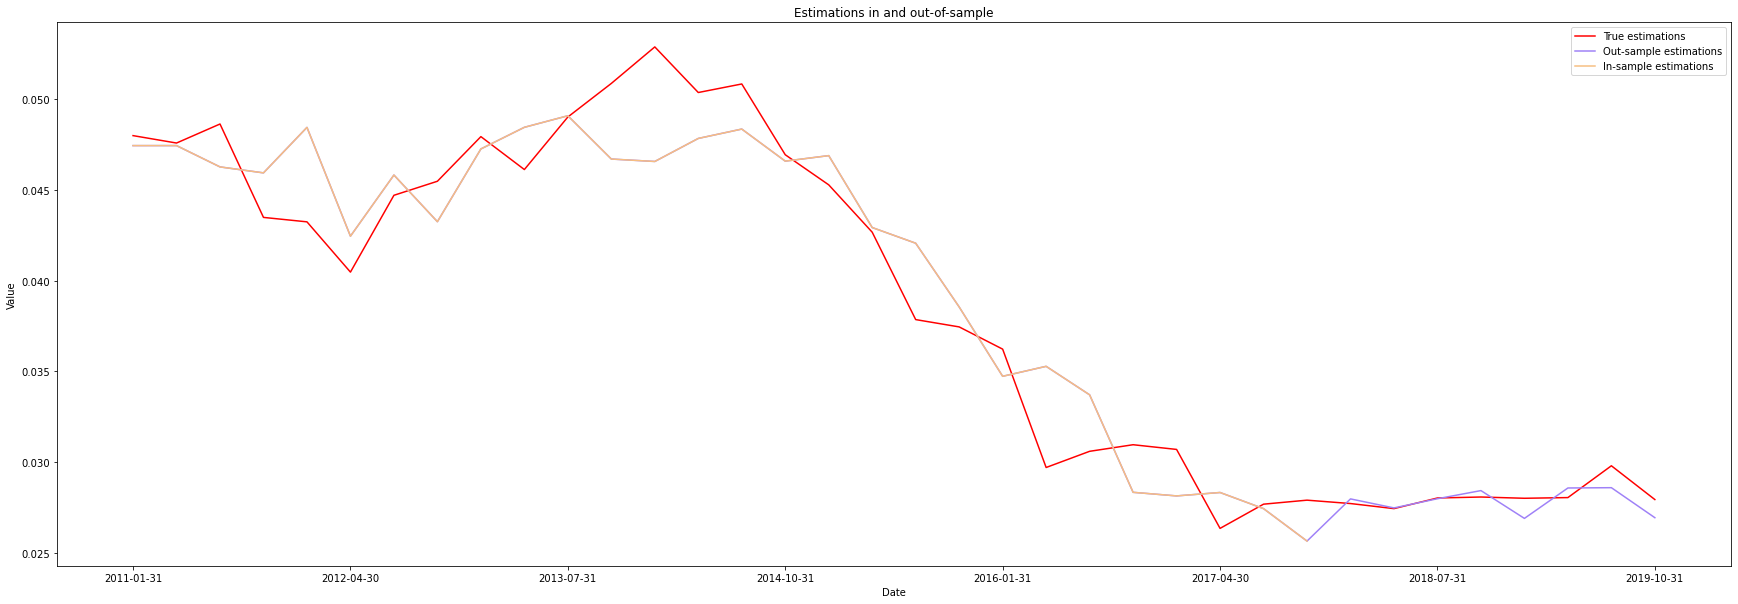

In [13]:
# plot the estimated values of the best model
model.get_plot(date=date["Date"], color1="red", color2="#9F81F7", color3="#F7BE81")